In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split # Importing train_test_split


# Data preparation
data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/online_shoppers_intention.csv')
data = data.dropna(subset=['ProductRelated_Duration', 'BounceRates'])
X = data[['ProductRelated_Duration']].values
y = data['BounceRates'].values


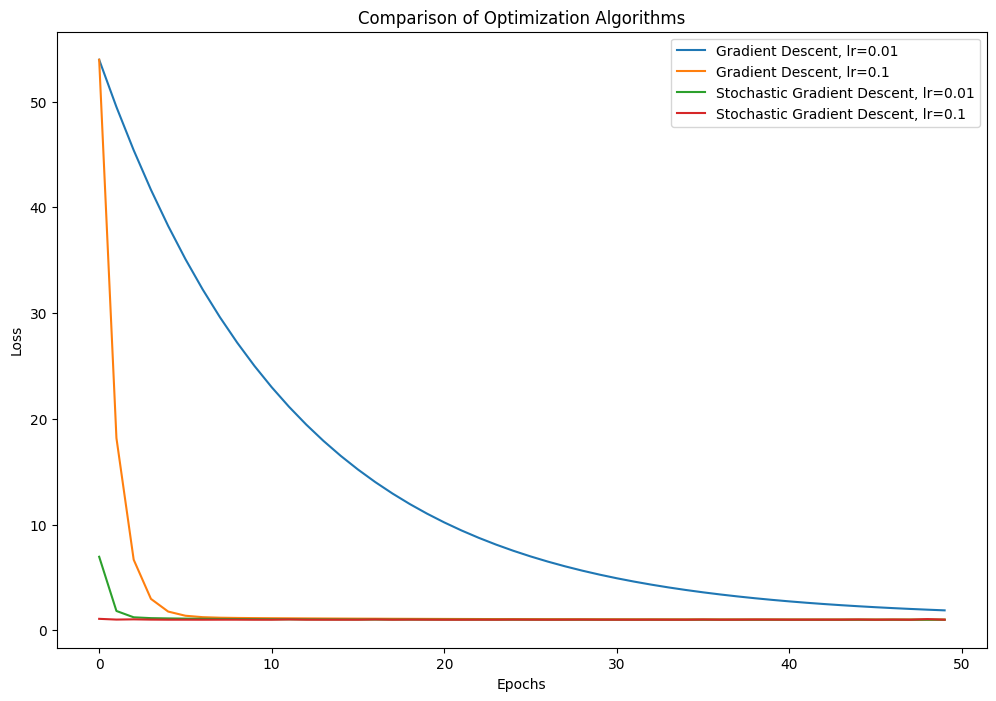

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Define optimizers
def gradient_descent(X, y, learning_rate=0.01, epochs=50):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    history = []
    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        loss = mean_squared_error(y, y_pred)
        history.append(loss)
        dw = (2 / m) * np.dot(X.T, (y_pred - y))
        db = (2 / m) * np.sum(y_pred - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, history

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=50, batch_size=32):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    history = []
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            y_pred = np.dot(X_batch, weights) + bias
            dw = (2 / len(X_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (2 / len(X_batch)) * np.sum(y_pred - y_batch)
            weights -= learning_rate * dw
            bias -= learning_rate * db
        y_pred_full = np.dot(X, weights) + bias
        history.append(mean_squared_error(y, y_pred_full))
    return weights, history

def gradient_descent_with_momentum(X, y, learning_rate=0.01, epochs=50, gamma=0.9):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    v_w = np.zeros(n)
    v_b = 0
    history = []
    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        loss = mean_squared_error(y, y_pred)
        history.append(loss)
        dw = (2 / m) * np.dot(X.T, (y_pred - y))
        db = (2 / m) * np.sum(y_pred - y)
        v_w = gamma * v_w + learning_rate * dw
        v_b = gamma * v_b + learning_rate * db
        weights -= v_w
        bias -= v_b
    return weights, bias, history

# Define additional optimizers (Momentum, RMSProp, Adam) as before.

# Testing optimizers
optimizers = {
    "Gradient Descent": gradient_descent,
    "Stochastic Gradient Descent": stochastic_gradient_descent,
    # Add other optimizers here
}

learning_rates = [0.01, 0.1]  # Reduced for faster execution

plt.figure(figsize=(12, 8))

for optimizer_name, optimizer in optimizers.items():
    for lr in learning_rates:
        _, history = optimizer(X_train, y_train, learning_rate=lr, epochs=50)  # Reduced epochs
        plt.plot(history, label=f"{optimizer_name}, lr={lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Optimization Algorithms")
plt.legend()
plt.show()


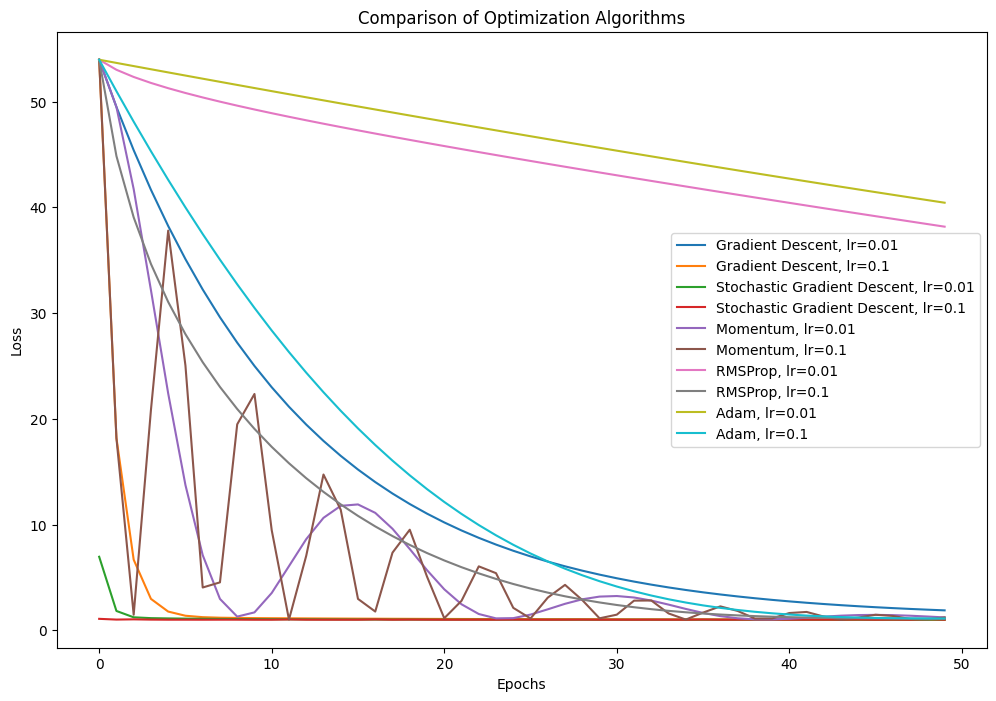

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Optimization algorithms
def gradient_descent(X, y, learning_rate=0.01, epochs=50):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    history = []
    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        loss = mean_squared_error(y, y_pred)
        history.append(loss)
        dw = (2 / m) * np.dot(X.T, (y_pred - y))
        db = (2 / m) * np.sum(y_pred - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias, history

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=50, batch_size=32):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    history = []
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            y_pred = np.dot(X_batch, weights) + bias
            dw = (2 / len(X_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (2 / len(X_batch)) * np.sum(y_pred - y_batch)
            weights -= learning_rate * dw
            bias -= learning_rate * db
        y_pred_full = np.dot(X, weights) + bias
        history.append(mean_squared_error(y, y_pred_full))
    return weights, bias, history

def gradient_descent_with_momentum(X, y, learning_rate=0.01, epochs=50, gamma=0.9):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    v_w = np.zeros(n)
    v_b = 0
    history = []
    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        loss = mean_squared_error(y, y_pred)
        history.append(loss)
        dw = (2 / m) * np.dot(X.T, (y_pred - y))
        db = (2 / m) * np.sum(y_pred - y)
        v_w = gamma * v_w + learning_rate * dw
        v_b = gamma * v_b + learning_rate * db
        weights -= v_w
        bias -= v_b
    return weights, bias, history

def rmsprop(X, y, learning_rate=0.01, epochs=50, beta=0.9, epsilon=1e-8):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    s_w = np.zeros(n)
    s_b = 0
    history = []
    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        loss = mean_squared_error(y, y_pred)
        history.append(loss)
        dw = (2 / m) * np.dot(X.T, (y_pred - y))
        db = (2 / m) * np.sum(y_pred - y)
        s_w = beta * s_w + (1 - beta) * (dw ** 2)
        s_b = beta * s_b + (1 - beta) * (db ** 2)
        weights -= (learning_rate / (np.sqrt(s_w) + epsilon)) * dw
        bias -= (learning_rate / (np.sqrt(s_b) + epsilon)) * db
    return weights, bias, history

def adam(X, y, learning_rate=0.01, epochs=50, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    m_w, v_w = np.zeros(n), np.zeros(n)
    m_b, v_b = 0, 0
    history = []
    for t in range(1, epochs + 1):
        y_pred = np.dot(X, weights) + bias
        loss = mean_squared_error(y, y_pred)
        history.append(loss)
        dw = (2 / m) * np.dot(X.T, (y_pred - y))
        db = (2 / m) * np.sum(y_pred - y)
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
        m_w_corr = m_w / (1 - beta1 ** t)
        m_b_corr = m_b / (1 - beta1 ** t)
        v_w_corr = v_w / (1 - beta2 ** t)
        v_b_corr = v_b / (1 - beta2 ** t)
        weights -= (learning_rate / (np.sqrt(v_w_corr) + epsilon)) * m_w_corr
        bias -= (learning_rate / (np.sqrt(v_b_corr) + epsilon)) * m_b_corr
    return weights, bias, history

# Optimizers to test
optimizers = {
    "Gradient Descent": gradient_descent,
    "Stochastic Gradient Descent": stochastic_gradient_descent,
    "Momentum": gradient_descent_with_momentum,
    "RMSProp": rmsprop,
    "Adam": adam
}

learning_rates = [0.01, 0.1]

plt.figure(figsize=(12, 8))

for optimizer_name, optimizer in optimizers.items():
    for lr in learning_rates:
        _, _, history = optimizer(X_train, y_train, learning_rate=lr, epochs=50)
        plt.plot(history, label=f"{optimizer_name}, lr={lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Optimization Algorithms")
plt.legend()
plt.show()
